In [2]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
params = {
    'format': 'geojson',
    'starttime': '2022-01-01',
    'endtime': '2022-12-31',
    'minmagnitude': 5
}

# Send the GET request
response = requests.get(url, params=params)
data = response.json()

# Extract features
features = data['features']

# Create lists to hold data
places = []
magnitudes = []
times = []
latitudes = []
longitudes = []

# Populate lists with data
for feature in features:
    properties = feature['properties']
    geometry = feature['geometry']
    places.append(properties['place'])
    magnitudes.append(properties['mag'])
    times.append(pd.to_datetime(properties['time'], unit='ms'))
    latitudes.append(geometry['coordinates'][1])
    longitudes.append(geometry['coordinates'][0])

# Create a DataFrame
df = pd.DataFrame({
    'Place': places,
    'Magnitude': magnitudes,
    'Time': times,
    'Latitude': latitudes,
    'Longitude': longitudes
})

# Display the first few rows
print(df.head())


                                 Place  Magnitude                    Time  \
0        67 km WSW of Changuillo, Peru        5.2 2022-12-30 21:53:29.589   
1                      south of Africa        5.2 2022-12-30 21:02:26.831   
2  216 km ENE of Lospalos, Timor Leste        5.0 2022-12-30 12:10:45.211   
3          65 km SSE of ‘Ohonua, Tonga        5.4 2022-12-30 09:42:09.278   
4  282 km W of Puerto Chacabuco, Chile        5.3 2022-12-30 05:19:18.616   

   Latitude  Longitude  
0  -14.9955   -75.7501  
1  -52.7091    27.9903  
2   -7.9548   128.8795  
3  -21.8971  -174.7611  
4  -45.8405   -76.4020  


In [3]:
print(df.describe())


         Magnitude                           Time     Latitude    Longitude
count  1725.000000                           1725  1725.000000  1725.000000
mean      5.324510  2022-06-26 13:11:27.139853056    -3.314550    29.709656
min       5.000000     2022-01-01 08:08:09.823000   -69.773900  -179.929500
25%       5.100000  2022-03-22 17:43:25.212999936   -23.496000   -73.975600
50%       5.200000  2022-06-21 19:08:15.929999872    -5.460400    86.782700
75%       5.500000  2022-09-29 09:55:57.972999936    21.640900   140.814400
max       7.600000     2022-12-30 21:53:29.589000    84.260700   179.998100
std       0.388001                            NaN    31.587143   122.151131


In [4]:
print(df.nlargest(10, 'Magnitude'))

                                      Place  Magnitude  \
486          35 km SSW of Aguililla, Mexico        7.6   
527   70 km E of Kainantu, Papua New Guinea        7.6   
253             205 km ESE of Neiafu, Tonga        7.3   
1328              57 km ENE of Namie, Japan        7.3   
962               10 km W of Azángaro, Peru        7.2   
198    18 km SW of Malango, Solomon Islands        7.0   
246                             Fiji region        7.0   
258               south of the Fiji Islands        7.0   
511          209 km SSE of Isangel, Vanuatu        7.0   
729         11 km NE of Bantay, Philippines        7.0   

                        Time  Latitude  Longitude  
486  2022-09-19 18:05:08.217   18.4552  -102.9561  
527  2022-09-10 23:47:00.233   -6.2944   146.5038  
253  2022-11-11 10:48:46.710  -19.2881  -172.1471  
1328 2022-03-16 14:36:30.997   37.7132   141.5793  
962  2022-05-26 12:02:21.110  -14.9076   -70.2924  
198  2022-11-22 02:03:06.891   -9.8198   159.6033

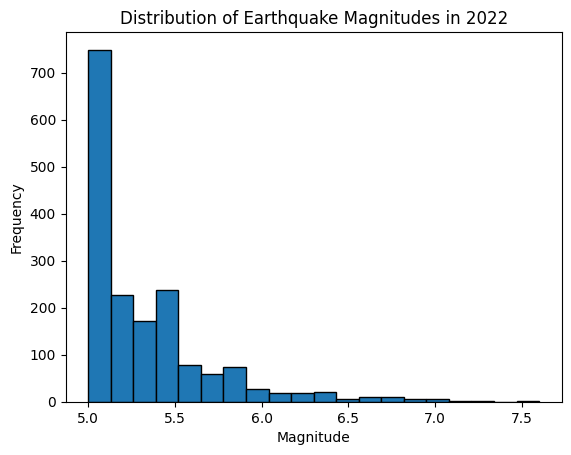

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Magnitude'], bins=20, edgecolor='black')
plt.title('Distribution of Earthquake Magnitudes in 2022')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


In [11]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add earthquake locations to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'],
        popup=f"{row['Place']} (Mag: {row['Magnitude']})",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Display the map
m.save('earthquakes_2022.html')
